In [2]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib as pyplot 
import seaborn as sns 
%matplotlib inline

In [3]:
df = pd.read_csv('season-1819_csv.csv')
#df = pd.read_sql(database.sqlite)
df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,...,1.79,17,-0.75,1.75,1.70,2.29,2.21,1.55,4.07,7.69
1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,...,1.83,20,-0.75,2.20,2.13,1.80,1.75,1.88,3.61,4.70
2,E0,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,...,1.87,22,-0.25,2.18,2.11,1.81,1.77,2.62,3.38,2.90
3,E0,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,...,1.84,23,1.00,1.84,1.80,2.13,2.06,7.24,3.95,1.58
4,E0,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,...,1.81,20,0.25,2.20,2.12,1.80,1.76,4.74,3.53,1.89


In [4]:
df.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD',
       'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA',
       'VCH', 'VCD', 'VCA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD',
       'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5',
       'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA',
       'PSCH', 'PSCD', 'PSCA'],
      dtype='object')

In [5]:
df_new= df.filter(['Date','HomeTeam', 'AwayTeam','FTHG', 'FTAG', 'FTR','HTHG','HTAG','BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5',
       'BbAv<2.5'], axis=1)


In [6]:
df_new.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5
0,10/08/2018,Man United,Leicester,2,1,H,1,0,2.12,2.03,1.85,1.79
1,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,2.05,1.98,1.92,1.83
2,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,2.00,1.95,1.96,1.87
3,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,2.05,1.98,1.90,1.84
4,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,2.10,2.01,1.88,1.81


In [7]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 12 columns):
Date        380 non-null object
HomeTeam    380 non-null object
AwayTeam    380 non-null object
FTHG        380 non-null int64
FTAG        380 non-null int64
FTR         380 non-null object
HTHG        380 non-null int64
HTAG        380 non-null int64
BbMx>2.5    380 non-null float64
BbAv>2.5    380 non-null float64
BbMx<2.5    380 non-null float64
BbAv<2.5    380 non-null float64
dtypes: float64(4), int64(4), object(4)
memory usage: 35.7+ KB


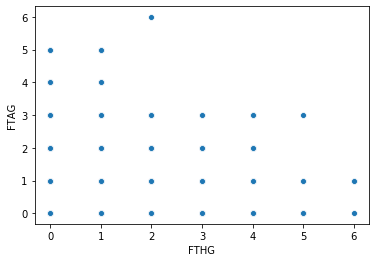

In [8]:
sns.scatterplot(x='FTHG',y='FTAG',data=df_new)

In [9]:
df_new.FTR[df_new.FTR == 'H'] = 1
df_new.FTR[df_new.FTR == 'A'] = 2
df_new.FTR[df_new.FTR == 'D'] = 3

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
df_new

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5
0,10/08/2018,Man United,Leicester,2,1,1,1,0,2.12,2.03,1.85,1.79
1,11/08/2018,Bournemouth,Cardiff,2,0,1,1,0,2.05,1.98,1.92,1.83
2,11/08/2018,Fulham,Crystal Palace,0,2,2,0,1,2.00,1.95,1.96,1.87
3,11/08/2018,Huddersfield,Chelsea,0,3,2,0,2,2.05,1.98,1.90,1.84
4,11/08/2018,Newcastle,Tottenham,1,2,2,1,2,2.10,2.01,1.88,1.81
5,11/08/2018,Watford,Brighton,2,0,1,1,0,2.46,2.35,1.67,1.59
6,11/08/2018,Wolves,Everton,2,2,3,1,1,2.20,2.09,1.83,1.75
7,12/08/2018,Arsenal,Man City,0,2,2,0,1,1.60,1.55,2.55,2.42
8,12/08/2018,Liverpool,West Ham,4,0,1,2,0,1.49,1.44,2.88,2.72
9,12/08/2018,Southampton,Burnley,0,0,3,0,0,2.45,2.34,1.67,1.60


In [11]:
df_new=df_new.drop(['Date'],axis=1)

In [12]:
df_new


,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5
0,Man United,Leicester,2,1,1,1,0,2.12,2.03,1.85,1.79
1,Bournemouth,Cardiff,2,0,1,1,0,2.05,1.98,1.92,1.83
2,Fulham,Crystal Palace,0,2,2,0,1,2.00,1.95,1.96,1.87
3,Huddersfield,Chelsea,0,3,2,0,2,2.05,1.98,1.90,1.84
4,Newcastle,Tottenham,1,2,2,1,2,2.10,2.01,1.88,1.81
5,Watford,Brighton,2,0,1,1,0,2.46,2.35,1.67,1.59
6,Wolves,Everton,2,2,3,1,1,2.20,2.09,1.83,1.75
7,Arsenal,Man City,0,2,2,0,1,1.60,1.55,2.55,2.42
8,Liverpool,West Ham,4,0,1,2,0,1.49,1.44,2.88,2.72
9,Southampton,Burnley,0,0,3,0,0,2.45,2.34,1.67,1.60


In [13]:
df_new.isnull().values.any()

False

In [14]:
#for i in [df_new]:
# df_new=df['HomeTeam'].map({'West Ham':1,'Everton':0,'Watford':3,'Tottenham':4,'Southampton':5,'Huddersfield':6,'Man United':7,
# 'Cardiff':8,'Wolves':9,'Liverpool':11,'Chelsea':12,'Leicester':13,'Newcastle':14,'Fulham':15,'Bournemouth':16,'Crystal Palace':17,'Arsenal':18,'Burnley':19,'Man City'20:,'Brighton':21})

In [15]:
from  sklearn.preprocessing import LabelEncoder ,OneHotEncoder
labelencoder=LabelEncoder()

In [16]:
# onehotencoder=OneHotEncoder(categorical_features=[1])
# x=onehotencoder.fit_transform(df_new).toarray()

In [48]:
dumies=pd.get_dummies(df['HomeTeam'])

In [49]:
dumies1=pd.get_dummies(df['AwayTeam'])

In [50]:
merged=pd.concat([dumies,dumies1])

In [51]:
merged.isnull().values.any()


False

In [52]:
merged

,Arsenal,Bournemouth,Brighton,Burnley,Cardiff,Chelsea,Crystal Palace,Everton,Fulham,Huddersfield,Leicester,Liverpool,Man City,Man United,Newcastle,Southampton,Tottenham,Watford,West Ham,Wolves
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [36]:
dumies1=pd.get_dummies(df['AwayTeam'])

In [55]:
merged1=pd.concat([merged,df_new]) 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [56]:
merged1


,Arsenal,AwayTeam,BbAv<2.5,BbAv>2.5,BbMx<2.5,BbMx>2.5,Bournemouth,Brighton,Burnley,Cardiff,...,Leicester,Liverpool,Man City,Man United,Newcastle,Southampton,Tottenham,Watford,West Ham,Wolves
0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,1.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [57]:
merged1=merged1.drop(['HomeTeam','AwayTeam'],axis=1)


In [58]:
merged1

,Arsenal,BbAv<2.5,BbAv>2.5,BbMx<2.5,BbMx>2.5,Bournemouth,Brighton,Burnley,Cardiff,Chelsea,...,Leicester,Liverpool,Man City,Man United,Newcastle,Southampton,Tottenham,Watford,West Ham,Wolves
0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [59]:
y=merged1['FTR']

In [60]:
x=merged1.drop(['FTR'],axis=1)

In [61]:
from sklearn.tree import DecisionTreeClassifier
cls=DecisionTreeClassifier()

In [63]:
cls.fit(x,y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').